## A quick look at the major economic indicators of a few countries  

We start by importing the relevant libraries and the [gdp-per-capita dataset from Kaggle](https://www.kaggle.com/datasets/shaswatatripathy/gdp-per-capita-gov-expenditure-trade/data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('fast')
sns.set_palette('husl')

# Read the dataset
dfgdp = pd.read_csv('gdp_per_capita.csv')
dfgdp = dfgdp.drop(columns=["Code"]) # useless column
summary = pd.DataFrame({
    'Column Type': dfgdp.dtypes,
    'Missing Values': dfgdp.isnull().sum(),
    'Total': dfgdp.count(),
    'Uniques': dfgdp.nunique(),
    'min': dfgdp.min(numeric_only=True),
    'mean': dfgdp.mean(numeric_only=True),
    'median': dfgdp.median(numeric_only=True),
    'max': dfgdp.max(numeric_only=True)
}).reset_index().rename(columns={'index': 'Column'})

# Display basic information
print("Dataset Info:")
print("-" * 100)
display(summary)

print("\nFirst few rows:")
print("-" * 100)
display(dfgdp.head())

Dataset Info:
----------------------------------------------------------------------------------------------------


,Column,Column Type,Missing Values,Total,Uniques,min,mean,median,max
0,Entity,object,0,147615,173,NaN,NaN,NaN,NaN
1,GDP per capita,float64,0,147615,9710,403.601900,8770.541322,3204.651900,160051.23000
2,Government expenditure (% of GDP),float64,139202,8413,8318,0.684444,23.679777,20.274118,594.76980
3,"Inflation, consumer prices (annual %)",float64,3884,143731,7859,-17.640425,7.225029,4.652298,23773.13000
4,Trade as a Share of GDP,float64,3886,143729,8231,0.000000,51.509635,48.775925,442.62003
5,Value of global merchandise exports as a share...,float64,15019,132596,10007,0.044430,19.745334,17.700430,302.30634
6,Year,int64,0,147615,223,1800.000000,1995.451099,2000.000000,2022.00000



First few rows:
----------------------------------------------------------------------------------------------------


,Entity,Year,GDP per capita,Value of global merchandise exports as a share of GDP,Government expenditure (% of GDP),Trade as a Share of GDP,"Inflation, consumer prices (annual %)"
0,Afghanistan,2005,964.4081,6.11945,NaN,NaN,12.686269
1,Afghanistan,2006,1057.0966,5.89436,NaN,NaN,6.784596
2,Afghanistan,2007,1259.9967,4.61202,NaN,NaN,8.680571
3,Afghanistan,2008,1319.6074,5.11368,NaN,NaN,26.418665
4,Afghanistan,2009,1557.3207,3.93394,NaN,NaN,-6.811161


In this notebook we'll look at Canada's data, with some of its major historical events. Note that these events are not an exhaustive list of influential events. 

In [2]:
# Plot GDP per capita
can_data = dfgdp[dfgdp['Entity'] == 'Canada']
summary = pd.DataFrame({
    'Column Type': can_data.dtypes,
    'Missing Values': can_data.isnull().sum(),
    'Total': can_data.count(),
    'Uniques': can_data.nunique(),
    'min': can_data.min(numeric_only=True),
    'mean': can_data.mean(numeric_only=True),
    'median': can_data.median(numeric_only=True),
    'max': can_data.max(numeric_only=True)
}).reset_index().rename(columns={'index': 'Column'})

# Display basic information
print("Canada Dataset Info:")
print("-" * 100)
display(summary)

Canada Dataset Info:
----------------------------------------------------------------------------------------------------


,Column,Column Type,Missing Values,Total,Uniques,min,mean,median,max
0,Entity,object,0,153,1,NaN,NaN,NaN,NaN
1,GDP per capita,float64,0,153,152,2609.000000,16600.027850,11298.000000,45529.645000
2,Government expenditure (% of GDP),float64,0,153,153,2.018480,23.415920,15.317500,53.340900
3,"Inflation, consumer prices (annual %)",float64,90,63,63,0.165563,3.741172,2.525120,12.471612
4,Trade as a Share of GDP,float64,91,62,62,35.331780,56.269858,53.191562,82.765360
5,Value of global merchandise exports as a share...,float64,8,145,145,11.799010,20.975183,19.652910,37.867080
6,Year,int64,0,153,153,1870.000000,1946.000000,1946.000000,2022.000000


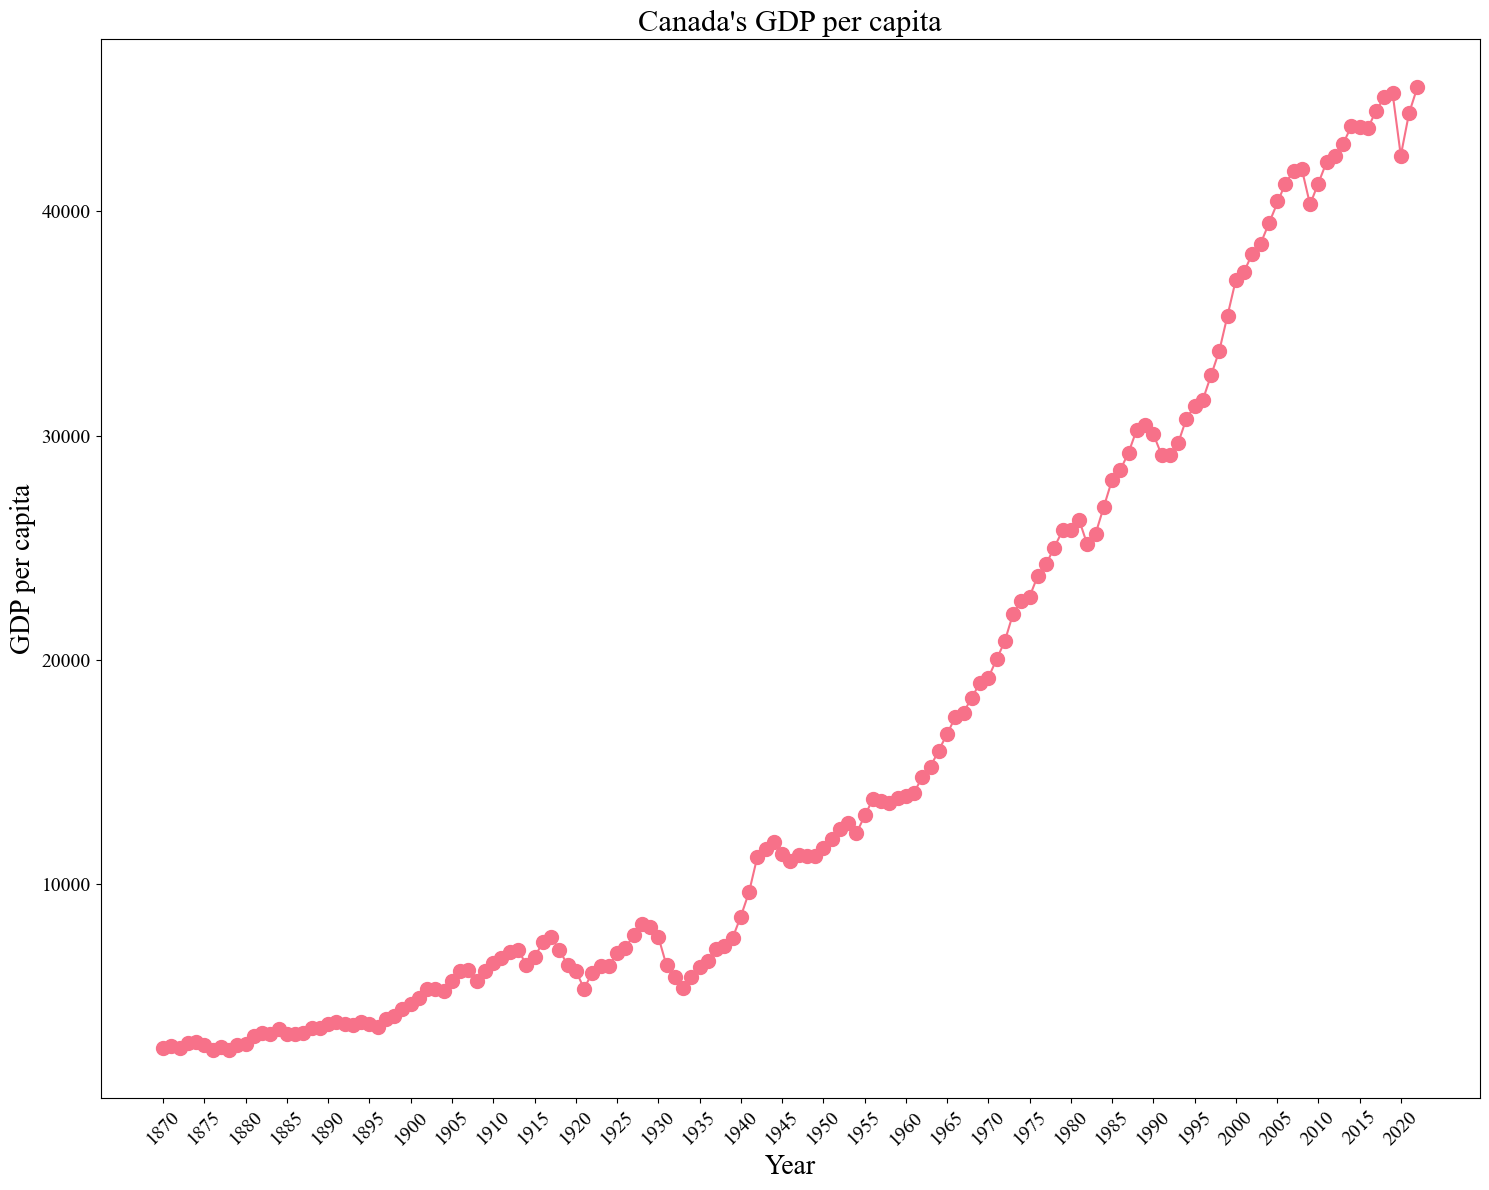

In [3]:
# Now let's create a visualization that combines economic indicators with major events
plt.figure(figsize=(15, 12))
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(can_data['Year'], can_data['GDP per capita'], label='GDP per capita', marker='o', markersize=10)
axes = plt.gca()
# Add vertical lines for major events

plt.title("Canada's GDP per capita", fontsize=22)
plt.xlabel('Year', fontsize=20)
plt.ylabel('GDP per capita', fontsize=20)
plt.xticks(np.arange(can_data['Year'].min(), 
                     can_data['Year'].max()+1, 
                     5),  # Show tick every 5 years
           rotation=45, 
           fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Events extracted from Wikipedia and other sources using Gen AI

In [4]:
canada_events = [
    {"Year": 1871, "Event": "British Columbia joins Canada, expands Pacific access", "Event Category": "Political"},
    {"Year": 1873, "Event": "Prince Edward Island joins Canadian Confederation", "Event Category": "Political"},
    {"Year": 1879, "Event": "National Policy introduces protective industry tariffs", "Event Category": "Economic"},
    {"Year": 1885, "Event": "Canadian Pacific Railway connects coast to coast", "Event Category": "Economic"},
    {"Year": 1896, "Event": "Klondike Gold Rush sparks economic boom", "Event Category": "Economic"},
    {"Year": 1905, "Event": "Alberta and Saskatchewan become new provinces", "Event Category": "Political"},
    {"Year": 1914, "Event": "WWI boosts manufacturing and war production", "Event Category": "Military"},
    {"Year": 1917, "Event": "Income tax introduced for war funding", "Event Category": "Economic"},
    {"Year": 1929, "Event": "Great Depression causes widespread economic hardship", "Event Category": "Economic"},
    {"Year": 1939, "Event": "WWII begins", "Event Category": "Military"},
    {"Year": 1940, "Event": "National unemployment insurance system established", "Event Category": "Social"},
    {"Year": 1945, "Event": "Post-war boom drives industrial growth", "Event Category": "Economic"},
    {"Year": 1965, "Event": "Auto Pact integrates US-Canada automotive industries", "Event Category": "Diplomatic"},
    {"Year": 1973, "Event": "Oil crisis triggers inflation and reforms", "Event Category": "Economic"},
    {"Year": 1981, "Event": "Recession hits with high interest rates", "Event Category": "Economic"},
    {"Year": 1989, "Event": "US-Canada Free Trade Agreement reduces barriers", "Event Category": "Diplomatic"},
    {"Year": 1994, "Event": "NAFTA expands North American trade relations", "Event Category": "Diplomatic"},
    {"Year": 1997, "Event": "Federal budget balanced after thirty years", "Event Category": "Economic"},
    {"Year": 2008, "Event": "Canada weathers global financial crisis well", "Event Category": "Economic"},
    {"Year": 2015, "Event": "National carbon pricing strategy implemented", "Event Category": "Political"},
    {"Year": 2018, "Event": "Cannabis legalization creates new tax revenue", "Event Category": "Social"},
    {"Year": 2020, "Event": "COVID-19 triggers emergency financial support", "Event Category": "Social"},
    {"Year": 2021, "Event": "Economy recovers with 4.6% GDP growth", "Event Category": "Economic"},
    {"Year": 2022, "Event": "High inflation prompts interest rate increases", "Event Category": "Economic"}
]

Adding color coding based on event categories

In [5]:
can_events = pd.DataFrame(canada_events)

color_dict = {
    'Political': '#E74C3C',    # Red
    'Economic': '#2ECC71',     # Green
    'Military': '#8E44AD',     # Purple
    'Diplomatic': '#3498DB',   # Blue
    'Social': '#F39C12',       # Orange
}

# Create the color list based on categories
event_colors = [color_dict[cat] for cat in can_events['Event Category']]

# Add these as new columns to the events_df
can_events['Color'] = event_colors

Adding other data and making an interactive plot

In [8]:
# Limiting to 1960 onwards
can_data = can_data[can_data['Year'] >= 1960]

# Create subplots
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        'GDP per capita', 
        'Government Expenditure', 
        'Trade Share',
        'Inflation Rate'
    ),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Function to add traces and events to a subplot
def add_interactive_plot(row, col, y_data, y_title):
    # Add main line
    fig.add_trace(
        go.Scatter(
            x=can_data['Year'],
            y=y_data,
            name=y_title,
            line=dict(color='#2E86C1', width=2.5),
            showlegend=False
        ),
        row=row, col=col
    )
    
    # Add event markers
    for _, event in can_events.iterrows():
        if event['Year'] in can_data['Year'].values:
            y_value = y_data[can_data['Year'] == event['Year']].iloc[0]
            
            # Add vertical line for event
            fig.add_trace(
                go.Scatter(
                    x=[event['Year'], event['Year']],
                    y=[y_data.min(), y_data.max()],
                    mode='lines',
                    line=dict(color=event['Color'], width=1, dash='dash'),
                    name=f"{event['Year']}: {event['Event']}",
                    hoverinfo='name',
                    showlegend=False
                ),
                row=row, col=col
            )
            
            # Add hover point for event
            fig.add_trace(
                go.Scatter(
                    x=[event['Year']],
                    y=[y_value],
                    mode='markers',
                    marker=dict(color=event['Color'], size=8),
                    name=f"{event['Year']}: {event['Event']}",
                    text=f"Year: {event['Year']}<br>Event: {event['Event']}<br>Value: {y_value:.2f}<br>Category: {event['Event Category']}",
                    hoverinfo='text',
                    showlegend=False
                ),
                row=row, col=col
            )

# Add all subplots
add_interactive_plot(1, 1, can_data['GDP per capita'], 'GDP per capita')
add_interactive_plot(2, 1, can_data['Government expenditure (% of GDP)'], 'Government Expenditure')
add_interactive_plot(3, 1, can_data['Trade as a Share of GDP'], 'Trade Share')
add_interactive_plot(4, 1, can_data['Inflation, consumer prices (annual %)'], 'Inflation Rate')

# Update layout
fig.update_layout(
    title=dict(
        text="Canada's Economic Indicators with major events (1960-2022)",
        x=0.5,
        y=0.98,
        xanchor='center',
        yanchor='top',
        font=dict(size=24)
    ),
    height=1000,
    width=1100,
    showlegend=True
)

# Update axes labels and formatting
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    gridcolor='lightgray',
    showgrid=True
)

fig.update_yaxes(
    gridcolor='lightgray',
    showgrid=True
)

# Add category legend
for category, color in color_dict.items():
    fig.add_trace(
        go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(size=10, color=color),
            name=category,
            showlegend=True
        )
    )

# Show the plot
fig.show()

# Display events table for reference
print("\nMajor Events Timeline:")
display(can_events.sort_values('Year'))


Major Events Timeline:


,Year,Event,Event Category,Color
0,1871,"British Columbia joins Canada, expands Pacific...",Political,#E74C3C
1,1873,Prince Edward Island joins Canadian Confederation,Political,#E74C3C
2,1879,National Policy introduces protective industry...,Economic,#2ECC71
3,1885,Canadian Pacific Railway connects coast to coast,Economic,#2ECC71
4,1896,Klondike Gold Rush sparks economic boom,Economic,#2ECC71
5,1905,Alberta and Saskatchewan become new provinces,Political,#E74C3C
6,1914,WWI boosts manufacturing and war production,Military,#8E44AD
7,1917,Income tax introduced for war funding,Economic,#2ECC71
8,1929,Great Depression causes widespread economic ha...,Economic,#2ECC71
9,1939,WWII begins,Military,#8E44AD
